In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [164]:
# Load data
dataset = pd.read_csv('train.csv')
dataset.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [165]:
# features and labels
X = dataset.iloc[:, 0:20].values
y = dataset.iloc[:, 20].values

# Normalization
for i, x in enumerate(X):
    minVal = np.min(x)
    norm_x = np.subtract(x, minVal)
    maxVal = np.max(norm_x)
    norm_x = np.divide(norm_x, maxVal)
    X[i] = norm_x

# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [166]:
Xt=list(X_train)
yt=list(y_train)


In [167]:
dataset.shape

(2000, 21)

In [168]:
from sklearn.cluster import KMeans
#cluster_data = list(zip(list(Xt), list(yt)))
cluster_data=[]
for i in range(0,len(Xt)):
    cluster_data.append(list(Xt[i]))



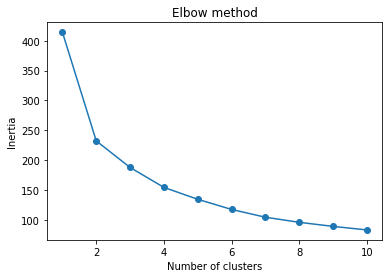

In [169]:
inertias=[]
for i in range(1,11):
    ball= KMeans(n_clusters=i)
    ball.fit(cluster_data)
    inertias.append(ball.inertia_)
    
    

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [170]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(cluster_data)



KMeans(n_clusters=2)

In [171]:
clusters=[0,1]
num_clusters=len(clusters)

## Training

In [172]:
# cluster_partitions = []
# for c in clusters:
#     partition = X_train[y_train == c]
#     # partition = dataset.loc[dataset['price_range'] == 0].iloc[:, :-1].values
#     cluster_partitions.append(partition)
# type(cluster_partitions)

In [173]:
cluster_partitions = []
cluster_indices=[] #stores indices of rows belonging to cluster number index
for j in range(num_clusters):
    partition=[]
    indices=[]
    for i in range(X_train.shape[0]):
        if kmeans.labels_[i]==j:
            partition.append(X_train[i])
            indices.append(i)
    cluster_partitions.append(partition)
    cluster_indices.append(indices)

In [174]:
K_VALUES = [3,5,7,9,11,13,15]

# Finding best k per cluster
k_clusters = [0 for _ in range(num_clusters)]
for i in range(num_clusters):
    data = cluster_partitions[i]
    label = clusters[i]
    most_count=[0 for _ in range(len(K_VALUES))]
    
    match = 0
    for test_point_index, test_point in enumerate(data):
        distances_dict = Counter()
        cluster_count = Counter()

        for index, train_point in enumerate(X_train):
            distances_dict[index] = np.sum(np.square(test_point - train_point))

        matched_k_list = []
        index=0
        for K in K_VALUES:
            for point_index, point in distances_dict.most_common()[-(K + 1):-1]:
                cluster_count[y_train[point_index]] += 1

            if cluster_count.most_common(1)[0][0] == y_train[test_point_index]:
                matched_k_list.append(K)
                most_count[index]=most_count[index]+1
            index=index+1

        
    # Taking the first best k value in case of ties
    maxpos = most_count.index(max(most_count))
    #print(most_count)

    k_clusters[i] = K_VALUES[maxpos]
    
#k_clusters

## Testing

In [175]:
Xtest=list(X_test)
kmeans=KMeans(n_clusters=2)

test_cluster_data=[]

for i in range(0,len(Xtest)):
    test_cluster_data.append(list(Xtest[i]))

kmeans.fit(test_cluster_data)



KMeans(n_clusters=2)

In [176]:
from sklearn.neighbors import KNeighborsClassifier


test_iter=list(X_test)
test_y=list(y_test)

final_acc=0

total=len(X_test)
print(total)

for j in clusters:
    index=0
    num=0
    test_points_in_cluster=[]
    test_y_in_cluster=[]
    for i in test_iter:
        if(kmeans.labels_[index]==j):
            test_points_in_cluster.append(i)
            test_y_in_cluster.append(y_test[index])
            num=num+1
        index=index+1

    classifier = KNeighborsClassifier(n_neighbors = k_clusters[j], metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    test_points_in_cluster=np.array(test_points_in_cluster)
    test_y_in_cluster=np.array(test_y_in_cluster)

    
    y_pred = classifier.predict(test_points_in_cluster)
    from sklearn.metrics import accuracy_score
    ac = accuracy_score(test_y_in_cluster,y_pred)
    final_acc+=(num/total)*ac
    
print("Final Accuracy is",final_acc)
        


400
Final Accuracy is 0.565
